# import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read Dataset

In [2]:
df = pd.read_csv('covid_19_india.csv',index_col='Sno')
# df.head()
df['Dt'] = pd.to_datetime(df.Date,dayfirst=True)
df['Dt'] = pd.to_datetime(df.Date,dayfirst=True)
df.drop(['Date'],axis='columns',inplace=True)
df

,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Dt
Sno,,,,,,,,
1,6:00 PM,Kerala,1,0,0,0,1,2020-01-30
2,6:00 PM,Kerala,1,0,0,0,1,2020-01-31
3,6:00 PM,Kerala,2,0,0,0,2,2020-02-01
4,6:00 PM,Kerala,3,0,0,0,3,2020-02-02
5,6:00 PM,Kerala,3,0,0,0,3,2020-02-03
...,...,...,...,...,...,...,...,...
6172,8:00 AM,Telengana,-,-,119467,940,152602,2020-09-11
6173,8:00 AM,Tripura,-,-,10255,173,17811,2020-09-11
6174,8:00 AM,Uttarakhand,-,-,18783,377,28266,2020-09-11


# Basic Analysis

In [3]:
df.info()
df.describe()
df.describe(include=object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6176 entries, 1 to 6176
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Time                      6176 non-null   object        
 1   State/UnionTerritory      6176 non-null   object        
 2   ConfirmedIndianNational   6176 non-null   object        
 3   ConfirmedForeignNational  6176 non-null   object        
 4   Cured                     6176 non-null   int64         
 5   Deaths                    6176 non-null   int64         
 6   Confirmed                 6176 non-null   int64         
 7   Dt                        6176 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 434.2+ KB


,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational
count,6176,6176,6176,6176
unique,7,42,62,12
top,8:00 AM,Kerala,-,-
freq,4538,226,5730,5730


# Data Cleaning 

In [4]:
df['ConfirmedIndianNational'].replace(['-'],['0'],inplace=True)
df['ConfirmedForeignNational'].replace(['-'],['0'],inplace=True)
df['ConfirmedIndianNational']=df['ConfirmedIndianNational'].astype('int64')
df['ConfirmedForeignNational']=df['ConfirmedForeignNational'].astype('int64')
df['month'] = pd.DatetimeIndex(df.Dt).month
df.drop(['Time'],axis=1,inplace=True)


In [5]:
df.head()
# df.dtypes

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Dt,month
Sno,,,,,,,,
1,Kerala,1,0,0,0,1,2020-01-30,1
2,Kerala,1,0,0,0,1,2020-01-31,1
3,Kerala,2,0,0,0,2,2020-02-01,2
4,Kerala,3,0,0,0,3,2020-02-02,2
5,Kerala,3,0,0,0,3,2020-02-03,2


# Processing data for visualization

In [6]:
confirmed_cases = df.pivot_table(index='State/UnionTerritory',columns='month',aggfunc='sum',values='Confirmed')
confirmed_cases.fillna(0,inplace=True)
confirmed_cases

month,1,2,3,4,5,6,7,8,9
State/UnionTerritory,,,,,,,,,
Andaman and Nicobar Islands,0.0,0.0,36.0,485.0,1023.0,1352.0,6372.0,63866.0,36224.0
Andhra Pradesh,0.0,0.0,163.0,18113.0,72785.0,216404.0,1520146.0,8700021.0,5351919.0
Arunachal Pradesh,0.0,0.0,0.0,28.0,41.0,2826.0,19775.0,82912.0,53746.0
Assam,0.0,0.0,0.0,901.0,7697.0,123711.0,639191.0,2281592.0,1352919.0
Bihar,0.0,0.0,73.0,3537.0,45653.0,195475.0,726921.0,3003495.0,1602100.0
Cases being reassigned to states,0.0,0.0,0.0,0.0,37520.0,240648.0,67397.0,0.0,0.0
Chandigarh,0.0,0.0,79.0,735.0,5745.0,10781.0,20413.0,68226.0,61341.0
Chhattisgarh,0.0,0.0,47.0,777.0,4408.0,49311.0,155442.0,513726.0,473606.0
Dadar Nagar Haveli,0.0,0.0,0.0,0.0,34.0,152.0,0.0,0.0,0.0


# Finding exact information from same state Telangana having duplicate records

In [7]:
x = confirmed_cases.loc['Telangana'] 
y = confirmed_cases.loc['Telangana***']
z = confirmed_cases.loc['Telengana***']
a= confirmed_cases.loc['Telengana']
lst = []
for i,j,k,l in zip(x,y,z,a):
    T = i+j+k+l
    lst.append(T)
lst


[0.0, 0.0, 559.0, 19419.0, 47230.0, 194444.0, 1205706.0, 2855205.0, 1545294.0]

# Dropping Duplicate records of same state Telangana

In [8]:
confirmed_cases.drop(['Telangana','Telangana***','Telengana***','Telengana'],axis=0,inplace=True)
confirmed_cases

month,1,2,3,4,5,6,7,8,9
State/UnionTerritory,,,,,,,,,
Andaman and Nicobar Islands,0.0,0.0,36.0,485.0,1023.0,1352.0,6372.0,63866.0,36224.0
Andhra Pradesh,0.0,0.0,163.0,18113.0,72785.0,216404.0,1520146.0,8700021.0,5351919.0
Arunachal Pradesh,0.0,0.0,0.0,28.0,41.0,2826.0,19775.0,82912.0,53746.0
Assam,0.0,0.0,0.0,901.0,7697.0,123711.0,639191.0,2281592.0,1352919.0
Bihar,0.0,0.0,73.0,3537.0,45653.0,195475.0,726921.0,3003495.0,1602100.0
Cases being reassigned to states,0.0,0.0,0.0,0.0,37520.0,240648.0,67397.0,0.0,0.0
Chandigarh,0.0,0.0,79.0,735.0,5745.0,10781.0,20413.0,68226.0,61341.0
Chhattisgarh,0.0,0.0,47.0,777.0,4408.0,49311.0,155442.0,513726.0,473606.0
Dadar Nagar Haveli,0.0,0.0,0.0,0.0,34.0,152.0,0.0,0.0,0.0


# Adding new row Telangana

In [9]:
confirmed_cases.loc['Telangana'] = lst
confirmed_cases

month,1,2,3,4,5,6,7,8,9
State/UnionTerritory,,,,,,,,,
Andaman and Nicobar Islands,0.0,0.0,36.0,485.0,1023.0,1352.0,6372.0,63866.0,36224.0
Andhra Pradesh,0.0,0.0,163.0,18113.0,72785.0,216404.0,1520146.0,8700021.0,5351919.0
Arunachal Pradesh,0.0,0.0,0.0,28.0,41.0,2826.0,19775.0,82912.0,53746.0
Assam,0.0,0.0,0.0,901.0,7697.0,123711.0,639191.0,2281592.0,1352919.0
Bihar,0.0,0.0,73.0,3537.0,45653.0,195475.0,726921.0,3003495.0,1602100.0
Cases being reassigned to states,0.0,0.0,0.0,0.0,37520.0,240648.0,67397.0,0.0,0.0
Chandigarh,0.0,0.0,79.0,735.0,5745.0,10781.0,20413.0,68226.0,61341.0
Chhattisgarh,0.0,0.0,47.0,777.0,4408.0,49311.0,155442.0,513726.0,473606.0
Dadar Nagar Haveli,0.0,0.0,0.0,0.0,34.0,152.0,0.0,0.0,0.0


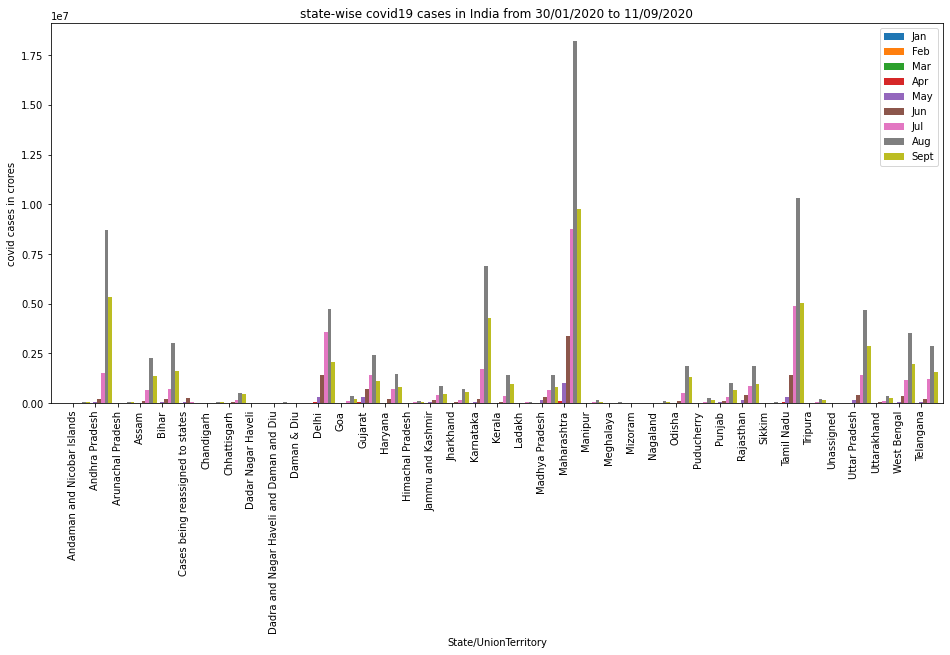

In [10]:
# import numpy as np
confirmed_cases.plot(figsize=(16,7),kind='bar',width=1.5,)
plt.ylabel('covid cases in crores')
plt.title('state-wise covid19 cases in India from 30/01/2020 to 11/09/2020')
plt.legend(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept'])

# Total Deaths in India state-wise

In [11]:
deaths = df.pivot_table(index='State/UnionTerritory',columns='month',aggfunc='sum',values='Deaths')
deaths.fillna(0,inplace=True)
x = deaths.loc['Telangana'] 
y = deaths.loc['Telangana***']
z = deaths.loc['Telengana***']
a= deaths.loc['Telengana']
lst = []
for i,j,k,l in zip(x,y,z,a):
    T = i+j+k+l
    lst.append(T)
deaths.drop(['Telangana','Telangana***','Telengana***','Telengana'],axis=0,inplace=True)
deaths.loc['Telangana'] = lst
deaths

month,1,2,3,4,5,6,7,8,9
State/UnionTerritory,,,,,,,,,
Andaman and Nicobar Islands,0.0,0.0,0.0,0.0,0.0,0.0,8.0,794.0,538.0
Andhra Pradesh,0.0,0.0,0.0,427.0,1469.0,2911.0,17526.0,79720.0,47770.0
Arunachal Pradesh,0.0,0.0,0.0,0.0,0.0,5.0,73.0,130.0,86.0
Assam,0.0,0.0,0.0,20.0,77.0,209.0,1414.0,5846.0,3889.0
Bihar,0.0,0.0,10.0,43.0,259.0,1246.0,5279.0,13705.0,7793.0
Cases being reassigned to states,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chandigarh,0.0,0.0,0.0,0.0,73.0,163.0,305.0,920.0,758.0
Chhattisgarh,0.0,0.0,0.0,0.0,2.0,228.0,764.0,4435.0,4023.0
Dadar Nagar Haveli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


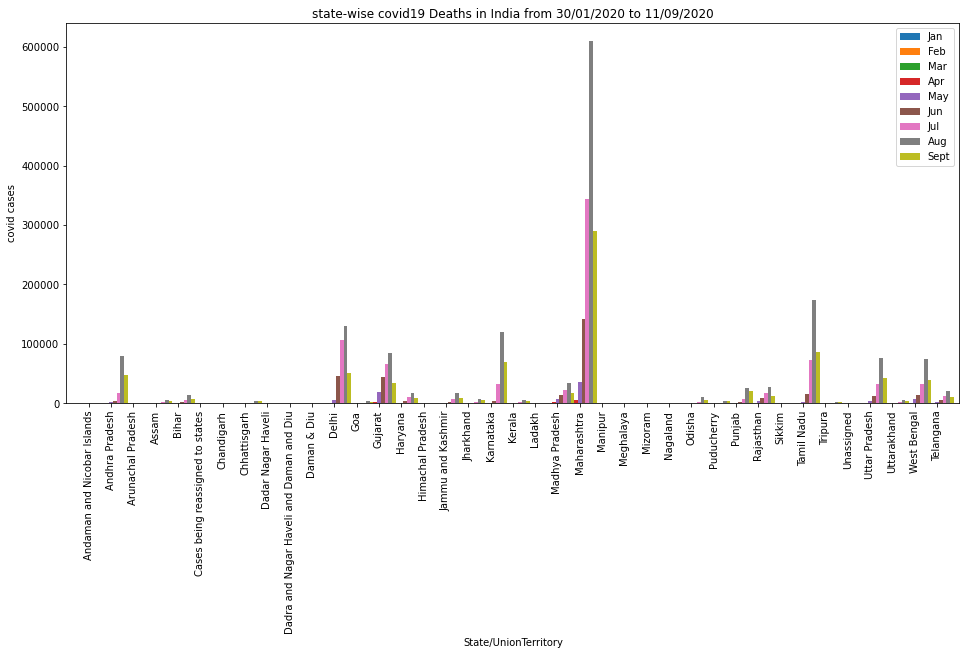

In [12]:
# import numpy as np
deaths.plot(figsize=(16,7),kind='bar',width=1.5,)
plt.ylabel('covid cases')
plt.title('state-wise covid19 Deaths in India from 30/01/2020 to 11/09/2020')
plt.legend(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept'])

# Total recovered from Covid19 in India Statewise

In [13]:
survived = df.pivot_table(index='State/UnionTerritory',columns='month',aggfunc='sum',values='Cured')
survived.fillna(0,inplace=True)
x = survived.loc['Telangana'] 
y = survived.loc['Telangana***']
z = survived.loc['Telengana***']
a= survived.loc['Telengana']
lst = []
for i,j,k,l in zip(x,y,z,a):
    T = i+j+k+l
    lst.append(T)
survived.drop(['Telangana','Telangana***','Telengana***','Telengana'],axis=0,inplace=True)
survived.loc['Telangana'] = lst
survived

month,1,2,3,4,5,6,7,8,9
State/UnionTerritory,,,,,,,,,
Andaman and Nicobar Islands,0.0,0.0,0.0,211.0,969.0,1075.0,3809.0,38101.0,31891.0
Andhra Pradesh,0.0,0.0,7.0,2325.0,40137.0,109430.0,733031.0,5932490.0,4204120.0
Arunachal Pradesh,0.0,0.0,0.0,10.0,31.0,438.0,7823.0,56687.0,37469.0
Assam,0.0,0.0,0.0,272.0,1582.0,66333.0,444439.0,1696631.0,1045914.0
Bihar,0.0,0.0,0.0,796.0,15985.0,128180.0,485002.0,2230840.0,1415100.0
Cases being reassigned to states,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chandigarh,0.0,0.0,0.0,266.0,2458.0,8609.0,14592.0,38360.0,36534.0
Chhattisgarh,0.0,0.0,0.0,525.0,1757.0,28094.0,112156.0,328779.0,228274.0
Dadar Nagar Haveli,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0


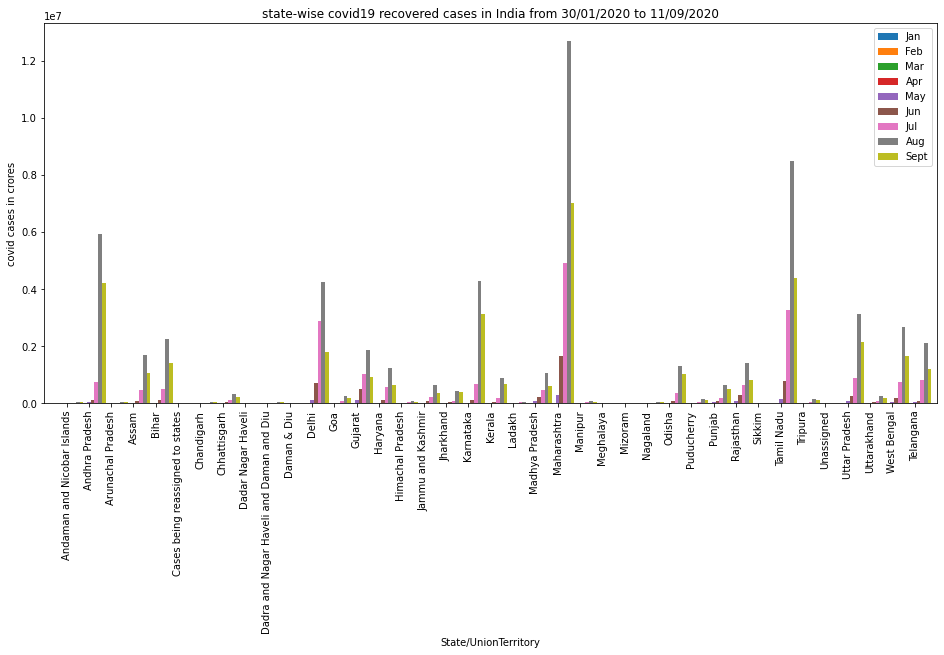

In [14]:
# import numpy as np
survived.plot(figsize=(16,7),kind='bar',width=1.5,)
plt.ylabel('covid cases in crores')
plt.title('state-wise covid19 recovered cases in India from 30/01/2020 to 11/09/2020')
plt.legend(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept'])

# Andhra Pradesh Covid Results..

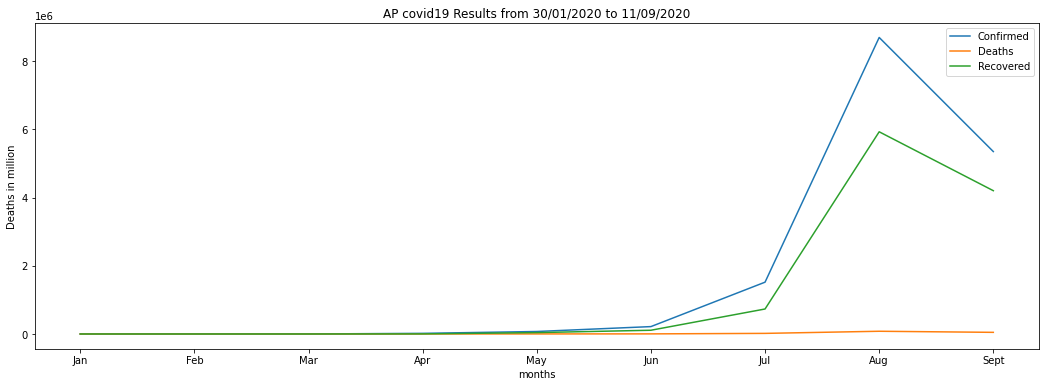

In [15]:
apc = df.pivot_table(index='State/UnionTerritory',columns='month',aggfunc='sum',values='Confirmed')
apc.fillna(0,inplace=True)
x = apc.loc['Andhra Pradesh']
apd = df.pivot_table(index='State/UnionTerritory',columns='month',aggfunc='sum',values='Deaths')
apd.fillna(0,inplace=True)
y = apd.loc['Andhra Pradesh']
apr = df.pivot_table(index='State/UnionTerritory',columns='month',aggfunc='sum',values='Cured')
apr.fillna(0,inplace=True)
z = apr.loc['Andhra Pradesh']
plt.figure(figsize=(18,6))
sns.lineplot(data=x,label='Confirmed')
sns.lineplot(data=y,label='Deaths')
sns.lineplot(data=z,label='Recovered')
plt.ylabel('Deaths in million')
plt.xlabel('months')
plt.title('AP covid19 Results from 30/01/2020 to 11/09/2020')
plt.xticks([1,2,3,4,5,6,7,8,9],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept'])
plt.legend()

# Kerala Results . 1st covid case in India on 30,jan,2020

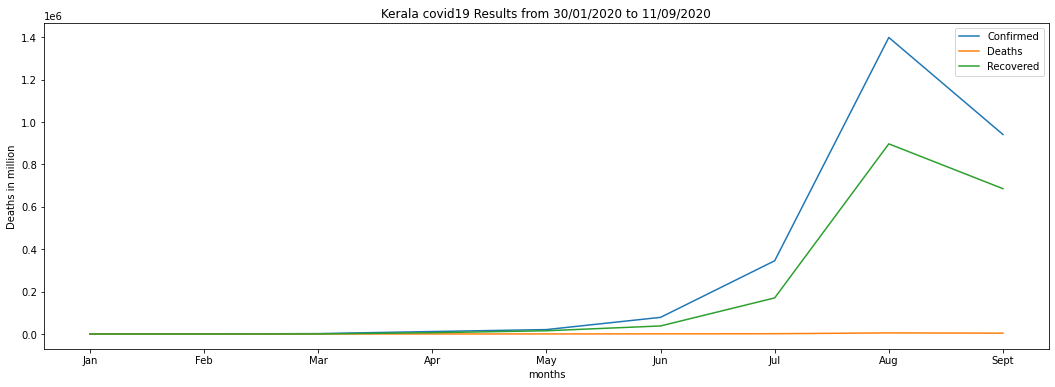

In [16]:
kc = df.pivot_table(index='State/UnionTerritory',columns='month',aggfunc='sum',values='Confirmed')
kc.fillna(0,inplace=True)
xk = apc.loc['Kerala']
kd = df.pivot_table(index='State/UnionTerritory',columns='month',aggfunc='sum',values='Deaths')
kd.fillna(0,inplace=True)
yk = apd.loc['Kerala']
kr = df.pivot_table(index='State/UnionTerritory',columns='month',aggfunc='sum',values='Cured')
kr.fillna(0,inplace=True)
zk = apr.loc['Kerala']
plt.figure(figsize=(18,6))
sns.lineplot(data=xk,label='Confirmed')
sns.lineplot(data=yk,label='Deaths')
sns.lineplot(data=zk,label='Recovered')
plt.ylabel('Deaths in million')
plt.xlabel('months')
plt.title('Kerala covid19 Results from 30/01/2020 to 11/09/2020')
plt.xticks([1,2,3,4,5,6,7,8,9],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept'])
plt.legend()

# Maharashtra Results.City having highest covid cases 

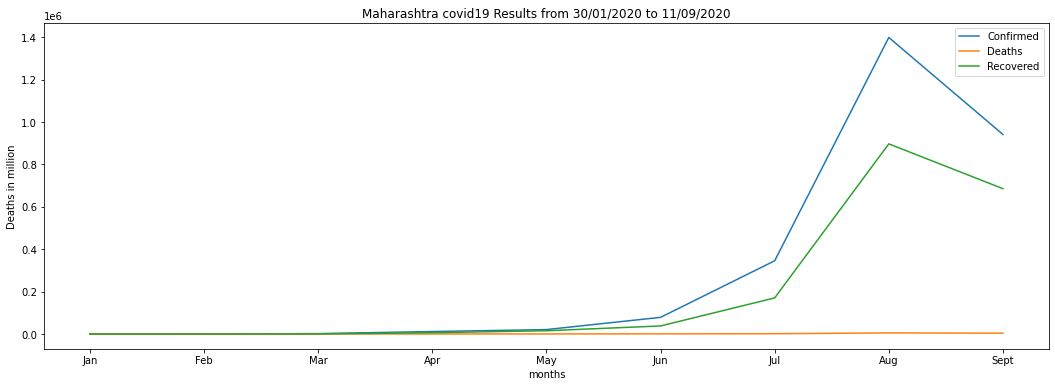

In [17]:
mc = df.pivot_table(index='State/UnionTerritory',columns='month',aggfunc='sum',values='Confirmed')
mc.fillna(0,inplace=True)
xm = apc.loc['Maharashtra']
md = df.pivot_table(index='State/UnionTerritory',columns='month',aggfunc='sum',values='Deaths')
md.fillna(0,inplace=True)
ym = apd.loc['Maharashtra']
mr = df.pivot_table(index='State/UnionTerritory',columns='month',aggfunc='sum',values='Cured')
mr.fillna(0,inplace=True)
zm = apr.loc['Maharashtra']
plt.figure(figsize=(18,6))
sns.lineplot(data=xk,label='Confirmed')
sns.lineplot(data=yk,label='Deaths')
sns.lineplot(data=zk,label='Recovered')
plt.ylabel('Deaths in million')
plt.xlabel('months')
plt.title('Maharashtra covid19 Results from 30/01/2020 to 11/09/2020')
plt.xticks([1,2,3,4,5,6,7,8,9],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept'])
plt.legend()